In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import lime
import shap


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
data = pd.read_csv('./maternal health data set 1/Maternal Health Risk Data Set 1.csv')

In [3]:
data.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [6]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
print(f"There are {data.duplicated().sum()} duplicates data")
data.loc[data.duplicated(keep=False)].sort_values(by=data.columns.to_list())


There are 562 duplicates data


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,6.0,99.0,70,mid risk
849,10,100,50,6.0,99.0,70,mid risk
552,12,90,60,7.5,102.0,60,low risk
940,12,90,60,7.5,102.0,60,low risk
543,12,90,60,7.5,102.0,66,low risk
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,mid risk
772,60,120,85,15.0,98.0,60,mid risk
818,60,120,85,15.0,98.0,60,mid risk
114,63,140,90,15.0,98.0,90,high risk


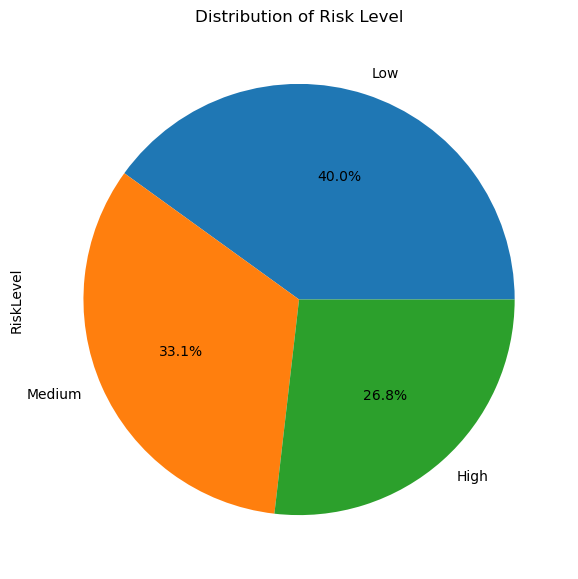

In [8]:
# print pie chart of the distribution of the target variable
data['RiskLevel'].value_counts().plot(kind='pie', labels=['Low', 'Medium', 'High'], autopct='%1.1f%%', figsize=(10, 7))
plt.title('Distribution of Risk Level')
plt.show()

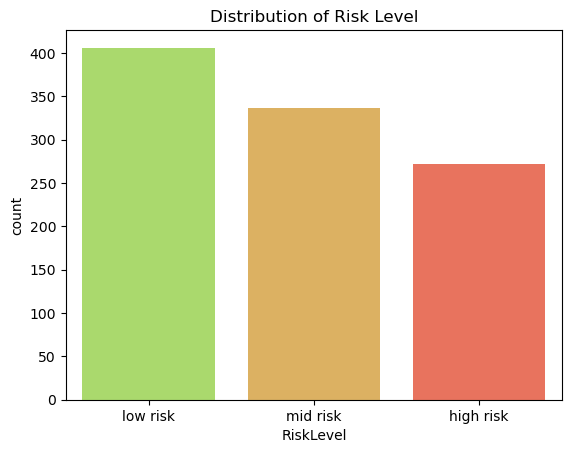

In [9]:

risk_order = ["low risk", "mid risk", "high risk"]
p_colors = ['#aceb5b', '#f0b74e', 'tomato']
sns.countplot(x="RiskLevel", data=data, order=risk_order, palette=p_colors)
plt.title("Distribution of Risk Level")
plt.show()

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [11]:
def num_plot(data, col):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(data=data, x=col, ax=ax[0], kde=True,)
    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[0].set_title(f"Histogram of {col}")
    ax[1].set_title(f"Boxplot of {col}")
    plt.show()

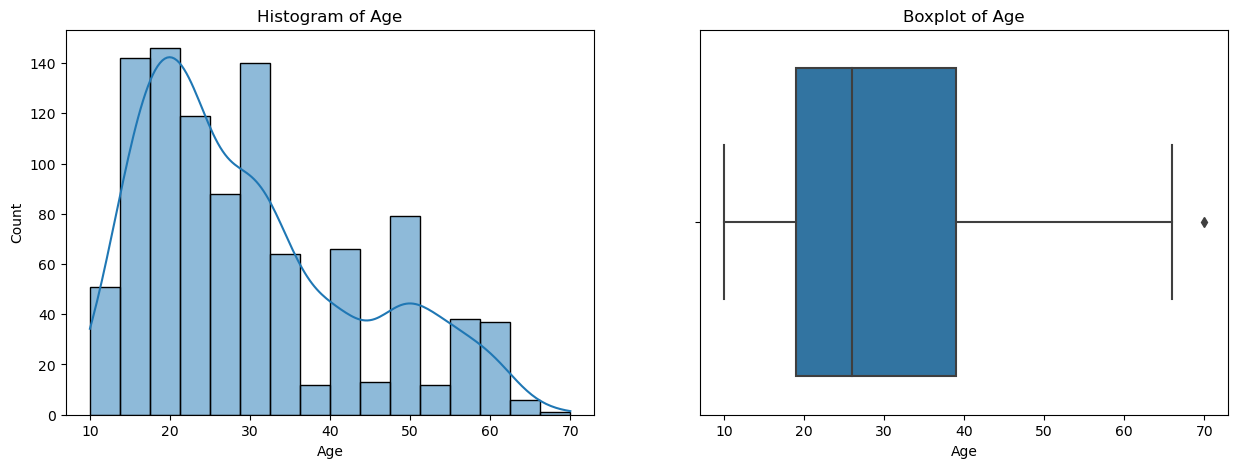

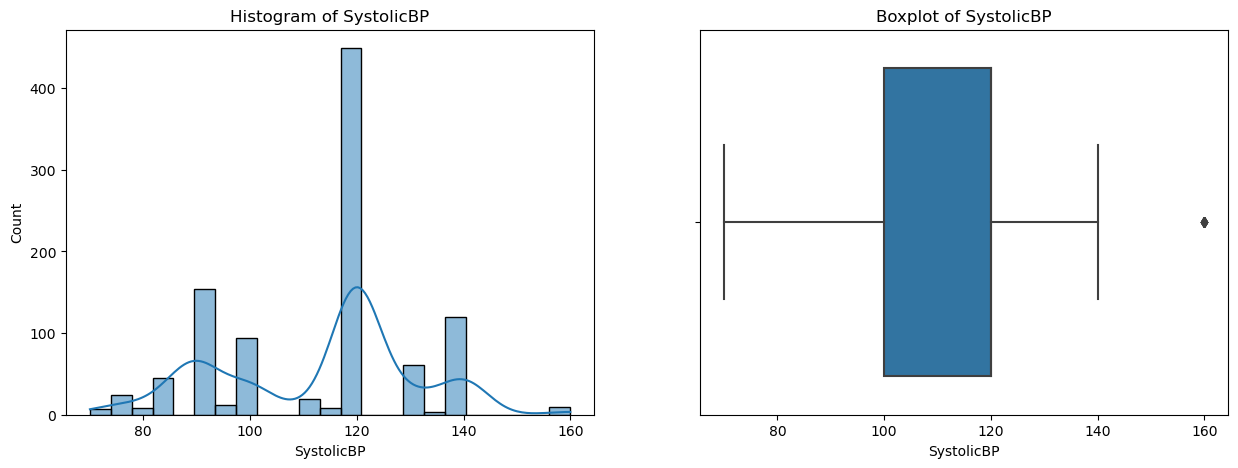

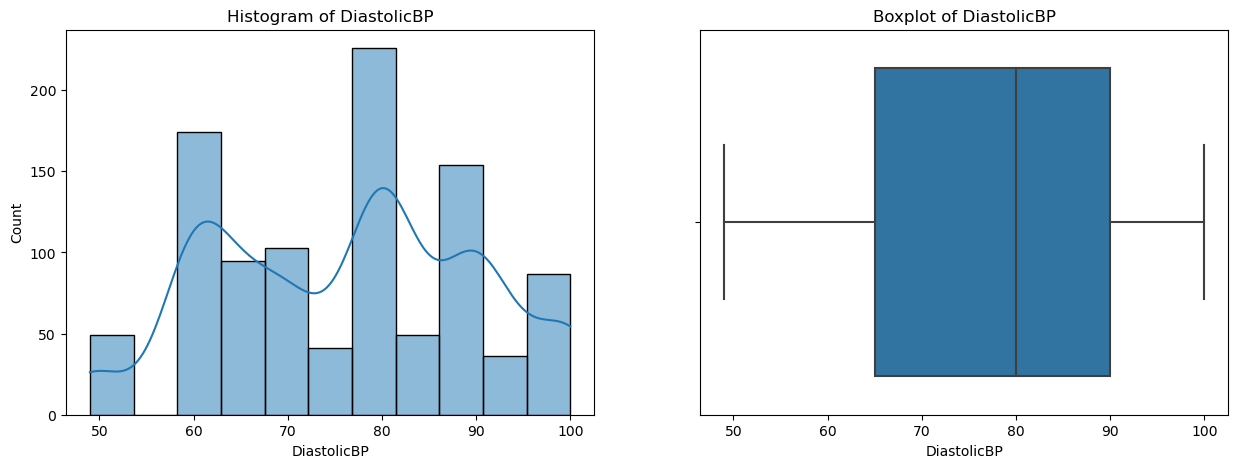

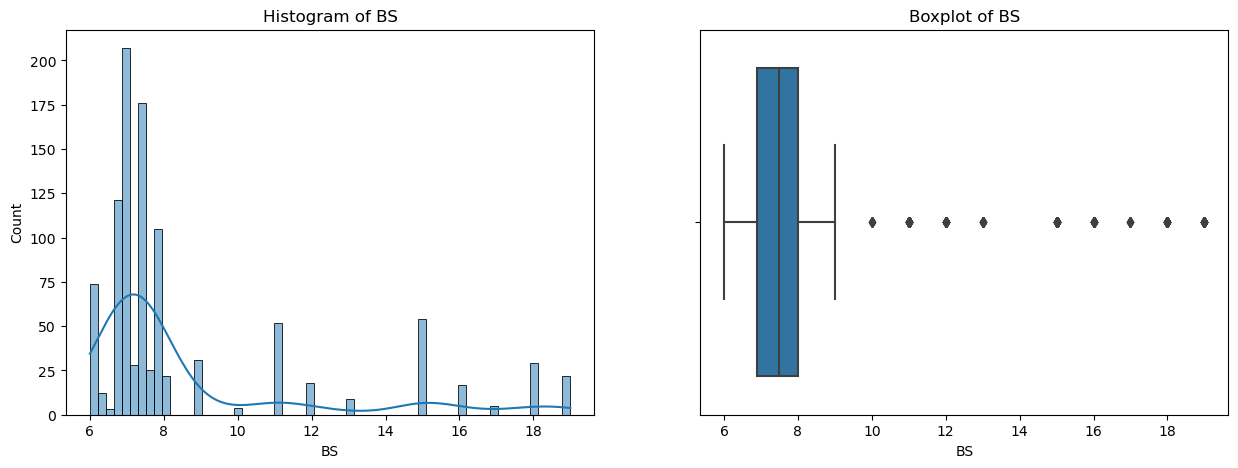

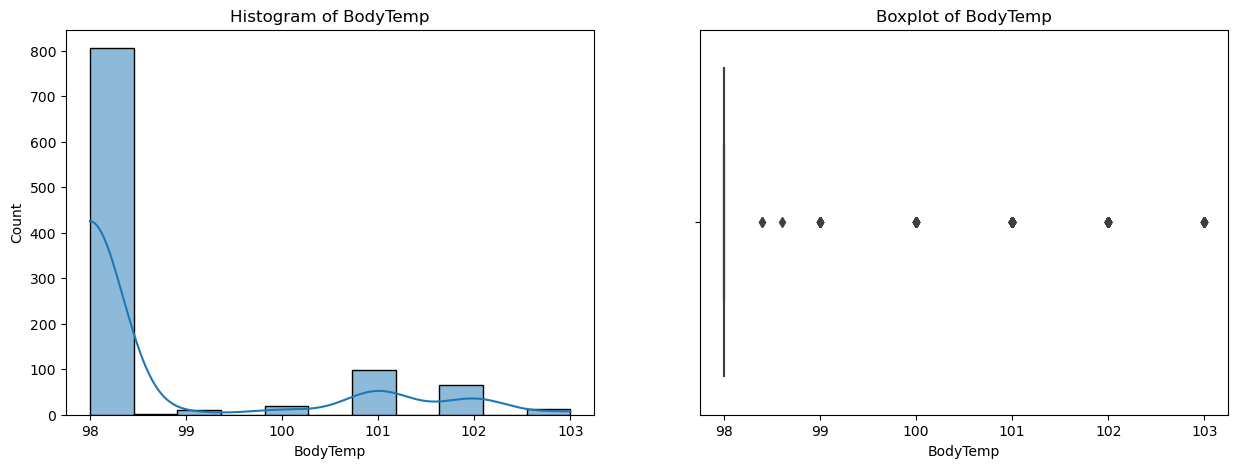

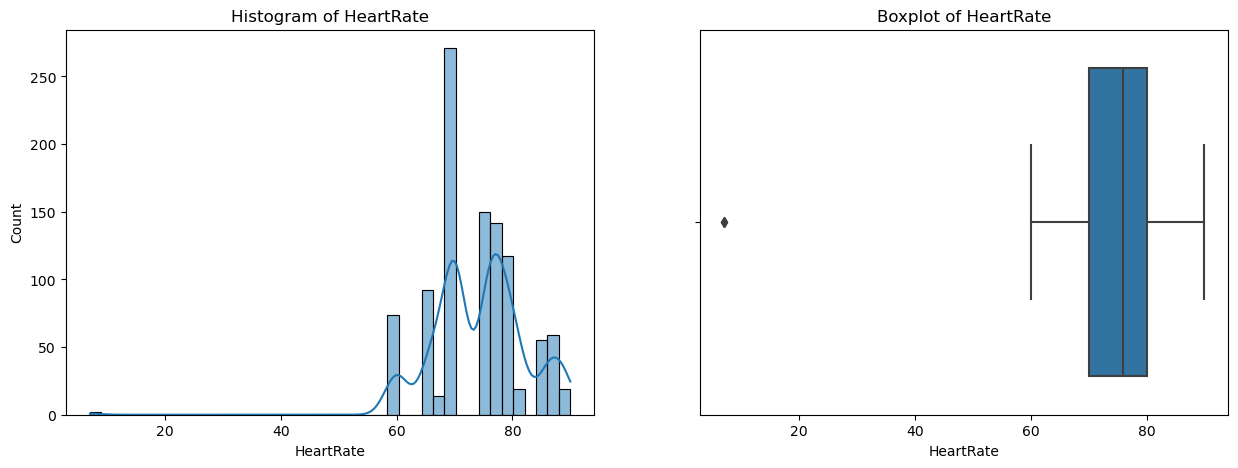

In [12]:
columns_list = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',]
for column in columns_list:
    num_plot(data, column)

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


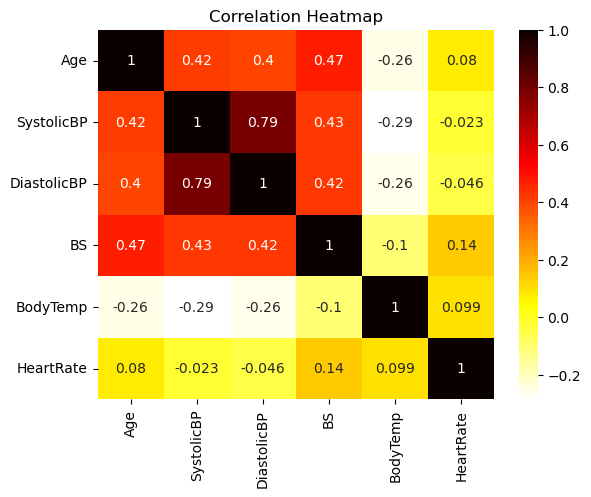

In [13]:
# bivariate analysis
sns.heatmap(data.corr(), annot=True, cmap='hot_r')
plt.title("Correlation Heatmap")
plt.show()

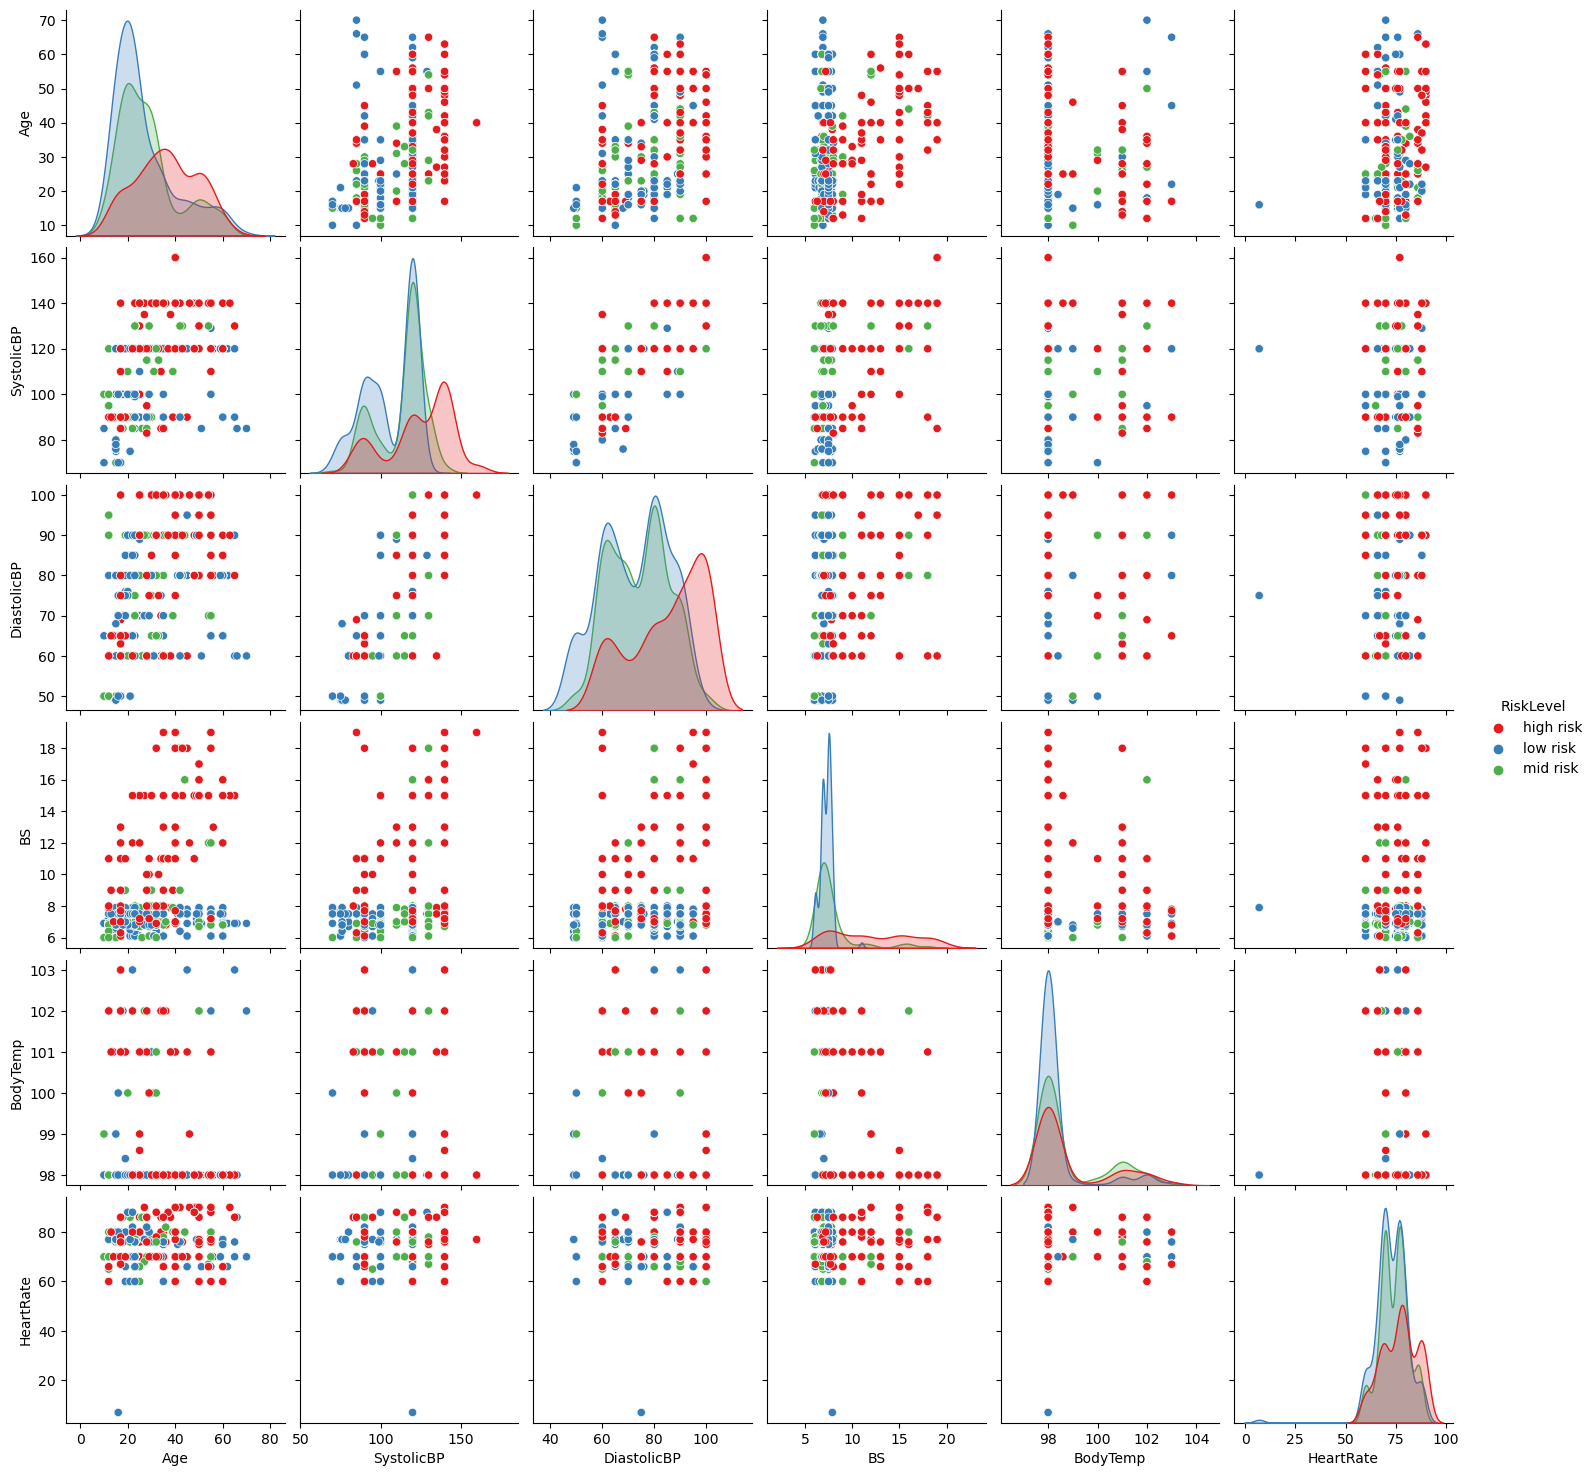

In [14]:
sns.pairplot(data, hue='RiskLevel', palette='Set1')

Age → RiskLevel

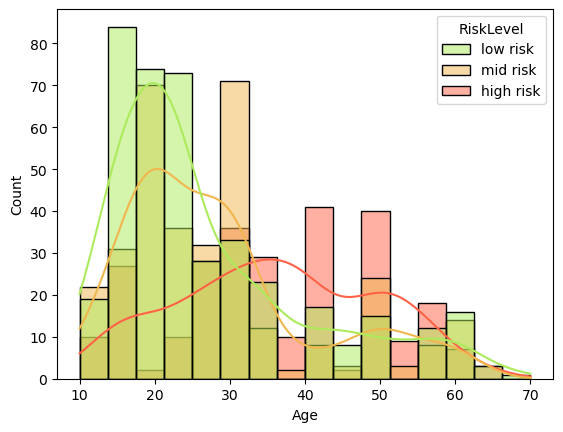

In [15]:
sns.histplot(data=data, x='Age', hue='RiskLevel', kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [16]:
pd.crosstab(data.RiskLevel, data.Age).style.background_gradient(cmap='hot_r')

Age,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,54,55,56,59,60,62,63,65,66,70
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,7,3,3,0,0,24,0,2,0,0,5,5,0,21,0,2,5,8,10,0,18,2,3,22,2,6,2,2,34,0,4,3,0,1,1,16,2,22,0,9,17,1,0,7,0,2,1,0,0
low risk,2,15,2,0,56,10,18,8,28,11,27,28,42,3,16,0,5,7,2,6,7,18,0,2,21,0,0,0,0,1,1,15,0,0,8,0,4,5,5,1,0,12,0,2,13,1,0,2,1,1
mid risk,2,13,7,0,4,6,21,11,37,11,11,12,24,0,11,3,2,16,30,14,15,12,3,0,7,2,0,0,2,2,0,4,2,3,0,0,6,2,16,0,3,8,0,0,14,0,0,0,0,0


Observation:

1. Pregnant women aged below 24 years mostly has low health risk.
2. Health risks will start to increase after that age (starting from the age of 25 years).
3. Surprisingly, the health risk of pregnant women over 59 years old is decreased

SystolicBP → RiskLevel

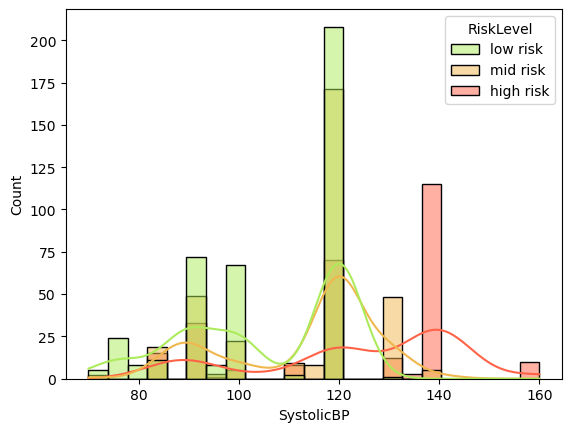

In [17]:
sns.histplot(data=data, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [18]:
pd.crosstab(data.RiskLevel, data.SystolicBP).style.background_gradient(cmap='hot_r')

SystolicBP,70,75,76,78,80,83,85,90,95,99,100,110,115,120,129,130,135,140,160
RiskLevel,,,,,,,,,,,,,,,,,,,
high risk,0,0,0,0,0,2,13,33,1,0,5,8,0,70,0,12,3,115,10
low risk,5,8,16,3,5,0,11,72,8,2,65,2,0,208,1,0,0,0,0
mid risk,2,0,0,0,0,0,19,49,3,0,22,9,8,171,0,48,0,5,0


Observation:

1. Pregnant women with upper value of blood pressure >= 100 mmHg mostly has low health risk.
2. The higher pregnant women's blood pressure, the higher the health risk

DiastolicBP  → RiskLevel

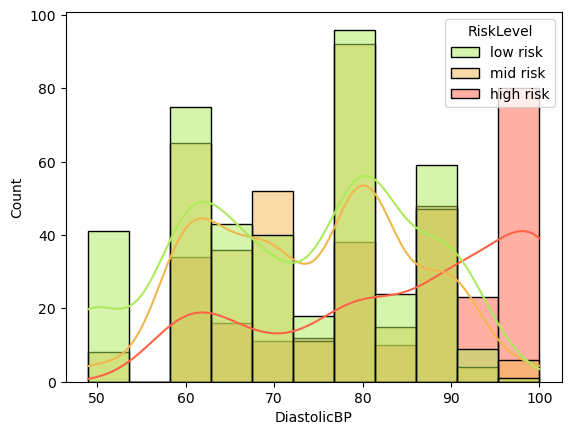

In [19]:
sns.histplot(data=data, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [20]:
pd.crosstab(data.RiskLevel, data.DiastolicBP).style.background_gradient(cmap='hot_r')

DiastolicBP,49,50,60,63,65,68,69,70,75,76,80,85,89,90,95,100
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,0,34,2,14,0,1,10,12,0,38,10,0,48,23,80
low risk,25,16,75,2,41,2,0,38,15,3,96,24,1,58,9,1
mid risk,0,8,65,4,32,0,0,52,11,0,92,15,0,47,4,6


Observation:

1. This variable has pretty similar pattern as SystolicBP. This is not surprising since they're highly correlated.

BS → RiskLevel

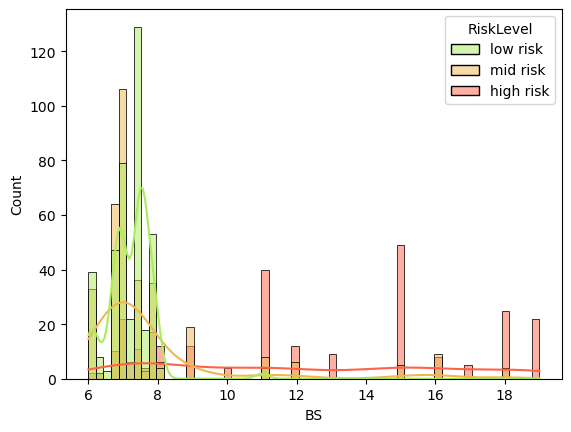

In [21]:
sns.histplot(data=data, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [22]:
pd.crosstab(data.RiskLevel, data.BS).style.background_gradient(cmap='hot_r')

BS,6.000000,6.100000,6.300000,6.400000,6.500000,6.600000,6.700000,6.800000,6.900000,7.000000,7.010000,7.100000,7.200000,7.500000,7.600000,7.700000,7.800000,7.900000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,15.000000,16.000000,17.000000,18.000000,19.000000
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,2,2,0,0,0,0,10,8,9,5,0,6,11,0,4,5,12,12,12,4,40,12,9,49,8,5,25,22
low risk,7,32,0,8,1,2,10,37,47,29,3,8,14,129,1,17,19,34,4,0,0,4,0,0,0,0,0,0,0
mid risk,14,19,0,2,0,0,23,41,58,41,7,0,0,36,0,3,21,14,6,19,0,8,6,0,5,9,0,4,0


Observation:

1. Almost every pregnant women with blood glucose level >= 8 has high health risk.
2. But otherwise, they seems to have lower health risk with blood glucose < 8

 BodyTemp → RiskLevel

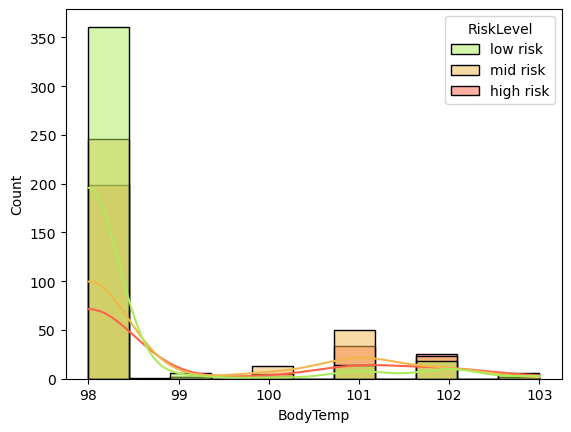

In [23]:
sns.histplot(data=data, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [24]:
pd.crosstab(data.RiskLevel, data.BodyTemp).style.background_gradient(cmap='hot_r')

BodyTemp,98.000000,98.400000,98.600000,99.000000,100.000000,101.000000,102.000000,103.000000
RiskLevel,,,,,,,,
high risk,199,0,1,2,5,34,25,6
low risk,359,2,0,6,2,14,18,5
mid risk,246,0,0,2,13,50,23,2


Observation:

1. Most pregnant women seem to have a body temperature of 98 F, which is normal body temperature
2. Pregnant women with body temperature >= 100 mostly has higher health risk

HeartRate → RiskLevel

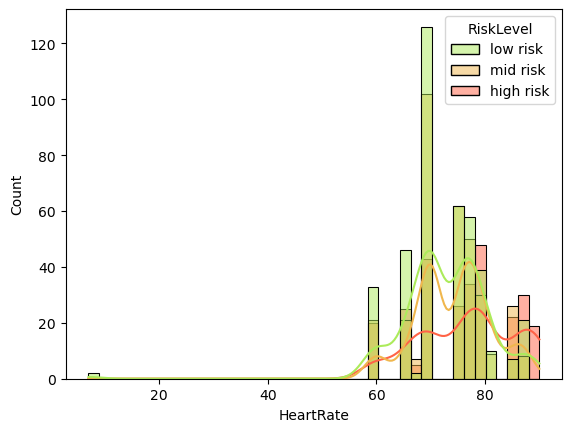

In [25]:
sns.histplot(data=data, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [26]:
pd.crosstab(data.RiskLevel, data.HeartRate).style.background_gradient(cmap='hot_r')

HeartRate,7,60,65,66,67,68,70,75,76,77,78,80,82,86,88,90
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,20,0,25,5,0,43,6,20,25,9,48,0,22,30,19
low risk,2,33,2,44,2,0,126,7,55,56,2,39,10,7,21,0
mid risk,0,21,3,18,5,2,102,6,56,15,35,30,9,26,8,0


Observation:

1. As i mentioned before, HeartRate variable has outlier that with a value that looks unnatural, which is 6 bpm.
2. Health risks seem to be getting higher along with the number of heart rate.

Outlier handling for HeartRate variable:

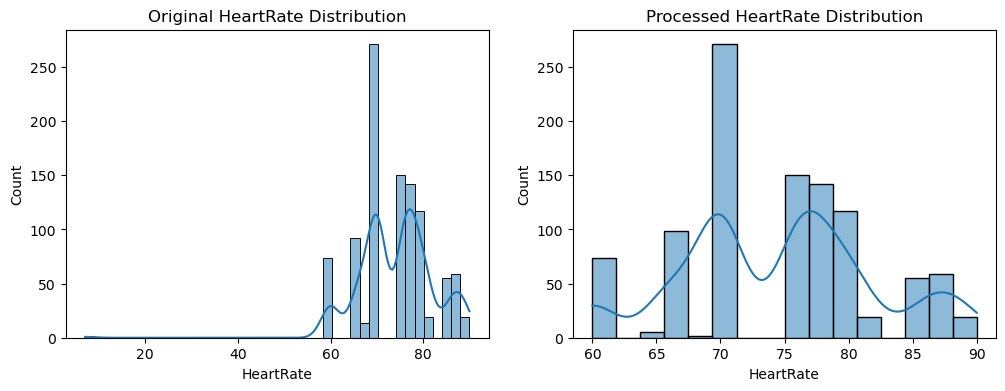

In [27]:
data_proc = data.drop(data.index[data.HeartRate == 7]) # drop the records that has heart rate of 7

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=data, x="HeartRate", kde=True, ax=ax[0])
sns.histplot(data=data_proc, x="HeartRate", kde=True, ax=ax[1])
ax[0].set_title("Original HeartRate Distribution")
ax[1].set_title("Processed HeartRate Distribution")
plt.show()

Removing irrelevant features

In [28]:
data_proc = data_proc.drop(['HeartRate'], axis=1)

In [29]:
data_proc.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,RiskLevel
0,25,130,80,15.0,98.0,high risk
1,35,140,90,13.0,98.0,high risk
2,29,90,70,8.0,100.0,high risk
3,30,140,85,7.0,98.0,high risk
4,35,120,60,6.1,98.0,low risk


In [30]:
label_encoder = LabelEncoder()
data_proc['RiskLevel'] = label_encoder.fit_transform(data_proc['RiskLevel'])

In [31]:
data_proc['RiskLevel'].unique()

array([0, 1, 2])

In [32]:
data_proc['RiskLevel'].value_counts()

1    404
2    336
0    272
Name: RiskLevel, dtype: int64

In [33]:
features = data_proc.drop(['RiskLevel'], axis=1)
target = data_proc['RiskLevel']

In [105]:
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [106]:
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

(809, 5)
(203, 5)
(809,)
(203,)


1. Random Forest Classifier

In [107]:
rf = RandomForestClassifier(random_state=100)
rf.fit(feature_train, target_train)
target_pred = rf.predict(feature_test)
print(f"Accuracy of Random Forest Classifier on test set: {accuracy_score(target_test, target_pred)*100}")

Accuracy of Random Forest Classifier on test set: 89.16256157635468


Hyper Parameter Tuning

In [108]:
# hyper parameter tuning

param_grid = {
    "n_estimators" : [10, 20, 50, 100],
    'criterion': ['gini', 'entropy'],
}

rf = RandomForestClassifier(random_state=100)
grid = GridSearchCV(rf, param_grid, cv = 10)
grid.fit(feature_train, target_train)
print("Best HyperParameter --> ", grid.best_params_)

Best HyperParameter -->  {'criterion': 'gini', 'n_estimators': 50}


In [109]:
target_pred = grid.predict(feature_test)
print("Accuracy of Random Forest Classifier after tuning --> ", accuracy_score(target_test, target_pred)*100)


Accuracy of Random Forest Classifier after tuning -->  90.14778325123153


2. XGBoost Classifier

In [39]:
xgb = XGBClassifier()
xgb.fit(feature_train, target_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [40]:

predictions= xgb.predict(feature_test)
percentage=xgb.score(feature_test,target_test)
res=confusion_matrix(target_test,predictions)
print("validation confusion matrix")
print(res)
print(classification_report(target_test, predictions))
# check the accuracy on the training set
# print('training accuracy = ',accuracy_score(feature_train, target_train))
# print('testing accuracy = ',accuracy_score(feature_test, target_test))

target_pred = xgb.predict(feature_test)
print('Accuracy of XGBoost Classifier on test set: {:.2f}'.format(accuracy_score(target_test, target_pred)*100))


validation confusion matrix
[[62  1  1]
 [ 1 69  9]
 [ 2  8 50]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.88      0.87      0.88        79
           2       0.83      0.83      0.83        60

    accuracy                           0.89       203
   macro avg       0.89      0.89      0.89       203
weighted avg       0.89      0.89      0.89       203

Accuracy of XGBoost Classifier on test set: 89.16


3. Decision Tree Classifier

In [41]:
dtc = DecisionTreeClassifier()

In [42]:
dtc.fit(feature_train, target_train)

DecisionTreeClassifier()

In [43]:
target_pred = dtc.predict(feature_test)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(accuracy_score(target_test, target_pred)*100))

Accuracy of Decision Tree Classifier on test set: 88.18


Scaling Data using Standard Scaler

In [111]:
scale = StandardScaler()
feature_scale_train = scale.fit_transform(feature_train)
feature_scale_test = scale.transform(feature_test)



In [112]:
dtc_1 = DecisionTreeClassifier()
dtc_1.fit(feature_scale_train, target_train)
target_pred = dtc_1.predict(feature_scale_test)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(accuracy_score(target_test, target_pred)*100))

Accuracy of Decision Tree Classifier on test set: 87.68


4. KNN Classifier

In [113]:

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(feature_train, target_train)
target_pred = knn.predict(feature_test)
print('Accuracy of KNN Classifier on test set: {:.2f}'.format(accuracy_score(target_test, target_pred)*100))


Accuracy of KNN Classifier on test set: 89.16


5. Support Vector Classifier 

In [114]:
svm = SVC()
svm.fit(feature_train, target_train)
target_pred = svm.predict(feature_test)
print('Accuracy of SVM Classifier on test set: {:.2f}'.format(accuracy_score(target_test, target_pred)*100))


Accuracy of SVM Classifier on test set: 60.10


SHAP EXPLAINER::

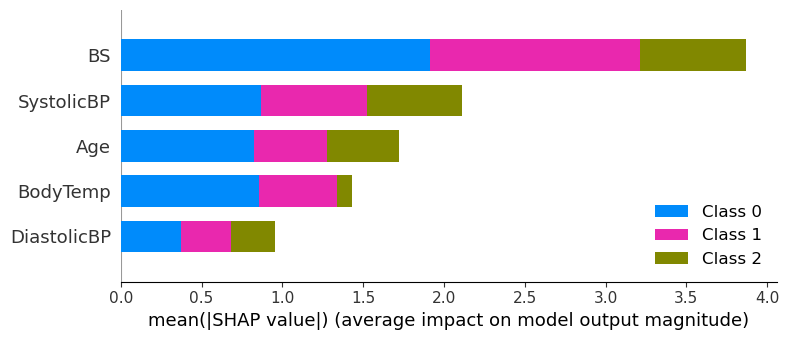

In [115]:
shap_explainer = shap.TreeExplainer(xgb)
shap_values = shap_explainer.shap_values(feature_train)

shap.summary_plot(shap_values=shap_values, features=feature_test, feature_names=features.columns, plot_type='bar')
# print(value)

In [123]:
shap_values = shap_explainer.shap_values(feature_test.iloc[10].values.reshape(1, -1))
shap.force_plot(shap_explainer.expected_value[1], shap_values[1], feature_test.iloc[10], feature_names=features.columns.tolist())


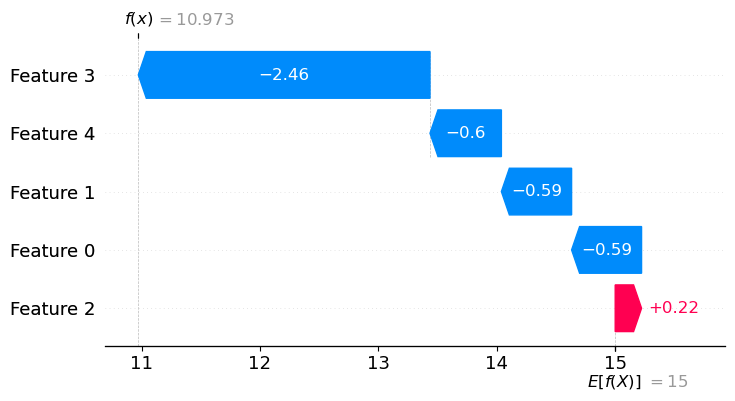

In [139]:

sample_index = 0
explanation = shap.Explanation(shap_values[sample_index], feature_train.iloc[sample_index, :])

# Define your custom feature names
feature_names = feature_train.columns.tolist()

# Create the waterfall plot with custom feature names
shap.plots.waterfall(explanation[0], max_display=10, show=False)

# Display the plot
plt.show()


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


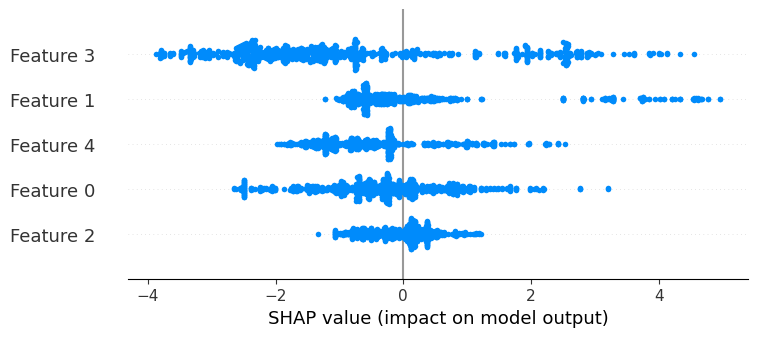

In [161]:
tree_explainer = shap.TreeExplainer(xgb)
shap_values = tree_explainer.shap_values(feature_train)

# create an Explanation object
explanation = shap.Explanation(shap_values, feature_train)

# plot the beeswarm plot for a single instance
shap.plots.beeswarm(explanation[0], max_display=10, show=False)
plt.show()
